In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913433 entries, 0 to 1913432
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 160.6+ MB


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
166   TRANSFER  3964978.72  C795408921   0.00           0.00            C1517408741  4607770.21      8572748.93      0.0      0.0               1
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0.0      0.0               1
                484.57      C1859216983  5422437.76     5422922.33      C657736958   5638778.53      5579568.65      0.0      0.0               1
                783.31      C1585711807  8150331.93     8151115.24      C284686302   2013.12         1229.81         0.0      0.0               1
                863.08      C1554118033  9290756.54     9291619.62      C5592464     5577.88         4714.80         0.0      0.0               1
                                                                                                                                               ..
                5763.99     C544966217   1276098.29     1281862.28      C1870252780  24632.95        46462.23        0.0      0.0               1
                5221.77     C164714495   1046.00        6267.77         C317071334   0.00            139555.44       0.0      0.0               1
                4865.48     C691096777   7395911.97     7400777.45      C1577213552  274039.11       217862.21       0.0      0.0               1
                2673.64     C1164394344  768815.91      771489.55       C1330400026  135676.32       817.21          0.0      0.0               1
                2643.45     C1574509514  6434890.26     6437533.71      C215145189   49974.00        1891.79         0.0      0.0               1
Name: count, Length: 1913432, dtype: int64

In [6]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,1911540
1.0,1892


In [7]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,1913432


In [8]:
df.isnull().sum().sum()

np.int64(3)

In [9]:
df.shape

(1913433, 11)

In [10]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,1)

np.float64(0.1)

In [11]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.1)

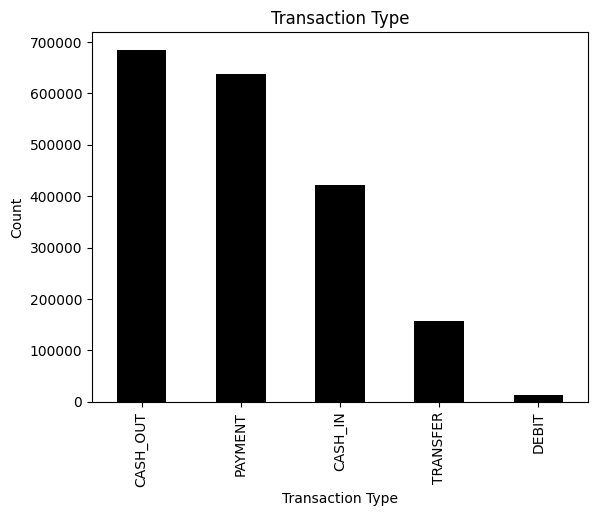

In [12]:
df["type"].value_counts().plot(kind="bar",title="Transaction Type", color ="black")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

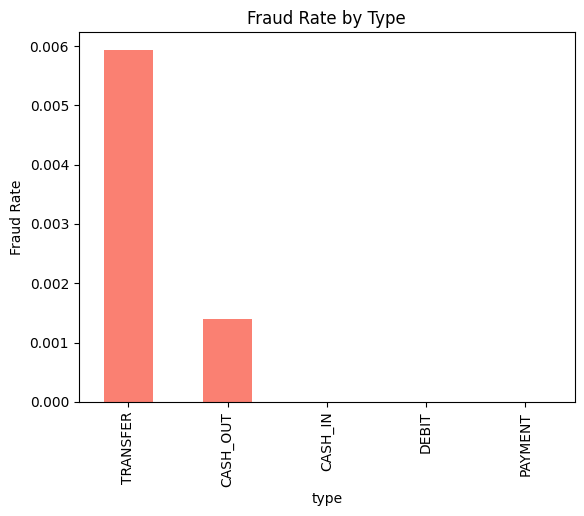

In [13]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type", color ="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [14]:
df["amount"].describe().astype(int)

,amount
count,1913433
mean,160721
std,266852
min,0
25%,13193
50%,78567
75%,216329
max,10000000


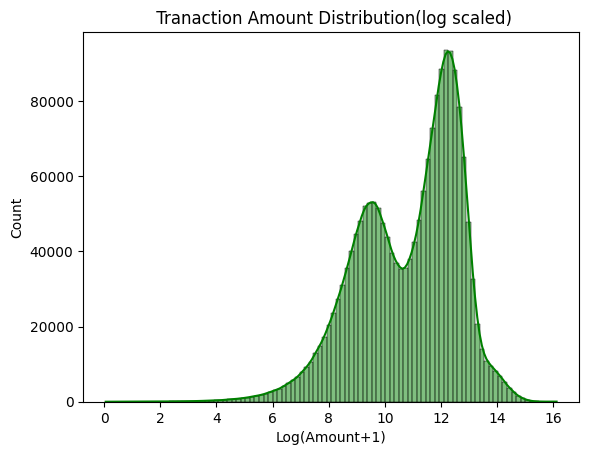

In [15]:
sns.histplot(np.log1p(df["amount"]), bins = 100,kde = True, color = "green")
plt.title(" Tranaction Amount Distribution(log scaled)")
plt.xlabel("Log(Amount+1)")
plt.show()

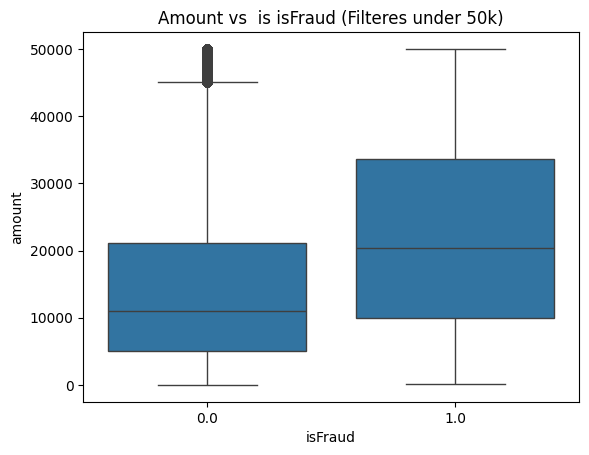

In [16]:
sns.boxplot(data= df[df["amount"]< 50000], x ="isFraud" , y= "amount")
plt.title("Amount vs  is isFraud (Filteres under 50k)")
plt.show()

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df["balanceDiff0rig"] = df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"]-df["oldbalanceDest"]


In [19]:
(df["balanceDiff0rig"] < 0).sum()

np.int64(420989)

In [20]:
(df["balanceDiffDest"] < 0).sum()

np.int64(374733)

In [21]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

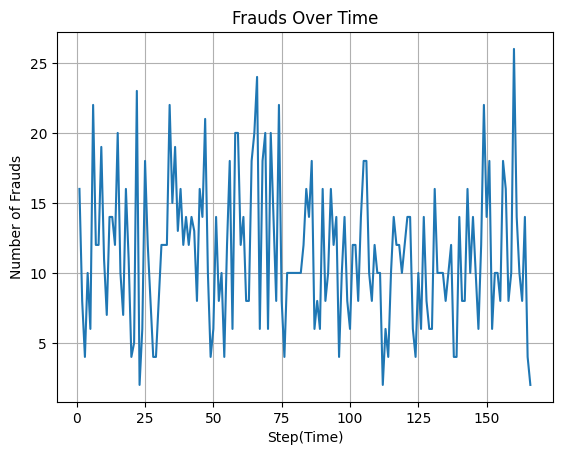

In [22]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label ="Frauds per step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show

In [23]:
df.drop(columns="step",inplace=True)

In [24]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [25]:
top_senders = df["nameOrig"].value_counts().head(10)

In [26]:
top_senders

,count
nameOrig,
C1999539787,3
C268192010,2
C1597284152,2
C525455810,2
C168273712,2
C1709295811,2
C1272971370,2
C1232232890,2
C981316169,2


In [27]:
top_recievers = df["nameDest"].value_counts().head(10)

In [28]:
top_recievers

,count
nameDest,
C985934102,101
C1286084959,98
C248609774,94
C665576141,94
C1590550415,91
C2083562754,89
C1360767589,86
C977993101,86
C306206744,85


In [29]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [30]:
fraud_users

,count
nameOrig,
C1966319241,1
C1305486145,1
C840083671,1
C1420196421,1
C979923889,1
C242919633,1
C2133722439,1
C1933312509,1
C1921431894,1


In [31]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [32]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,684793
TRANSFER,158226


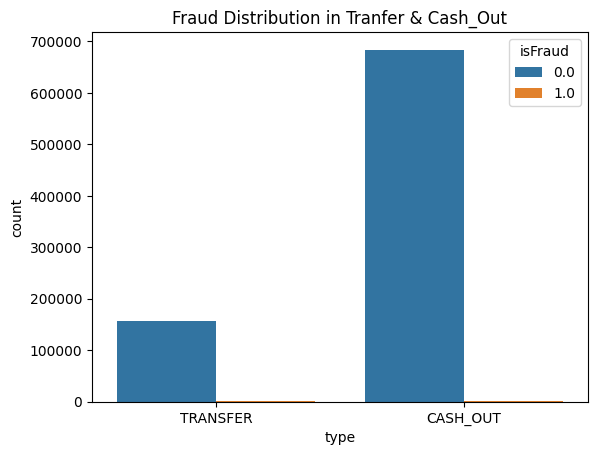

In [33]:
sns.countplot(data=fraud_types ,x="type", hue ="isFraud")
plt.title("Fraud Distribution in Tranfer & Cash_Out")
plt.show()

In [34]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [35]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.002081,-0.003253,0.216334,0.311631,0.131341
oldbalanceOrg,0.002081,1.000000,0.999037,0.092978,0.063551,0.005092
newbalanceOrig,-0.003253,0.999037,1.000000,0.094960,0.063327,-0.008678
oldbalanceDest,0.216334,0.092978,0.094960,1.000000,0.983612,-0.006842
newbalanceDest,0.311631,0.063551,0.063327,0.983612,1.000000,0.000464
isFraud,0.131341,0.005092,-0.008678,-0.006842,0.000464,1.000000


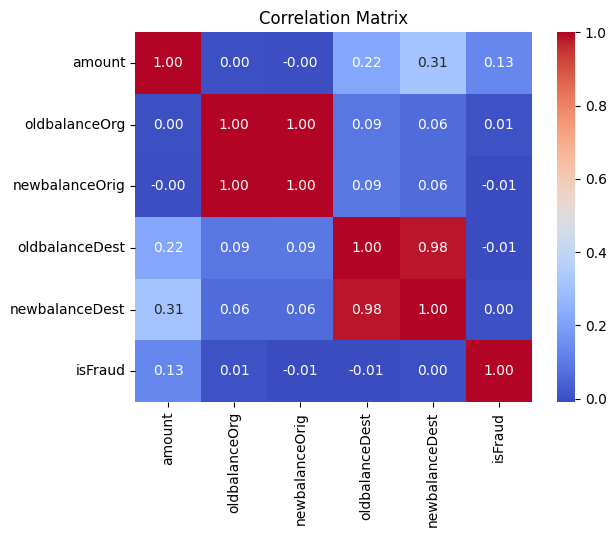

In [36]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [37]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0)&
    (df["newbalanceOrig"] == 0)&
    (df["type"].isin(["TRNSEFER","CASH_OUT"]))
]

In [38]:
len(zero_after_transfer)

289286

In [39]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1.0,0.0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.00,46430.44
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0.0,0.0,26845.41,-286384.84
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0.0,0.0,1942.02,-6146.82
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0.0,0.0,20411.53,-25742.00


In [40]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,1911540
1.0,1892


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [43]:
df_model = df.drop (["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [45]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [46]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)


In [47]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [48]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)


In [49]:
print(df.isnull().sum())


type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     1
isFraud            1
isFlaggedFraud     1
balanceDiff0rig    0
balanceDiffDest    1
dtype: int64


In [50]:
print(y.value_counts())
print(y.dtype)


isFraud
0.0    1911540
1.0       1892
Name: count, dtype: int64
float64


In [51]:
import numpy as np
import pandas as pd

# 1️⃣ Clean target column completely
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# Remove NaN labels
df = df.dropna(subset=['isFraud'])

# Keep only valid classes
df = df[df['isFraud'].isin([0, 1])]

# 2️⃣ Remove infinite values from dataset
df = df.replace([np.inf, -np.inf], np.nan)

# 3️⃣ Fill remaining NaN in feature columns
df = df.fillna(0)

# 4️⃣ Build X and y
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# 5️⃣ Convert text column
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# 6️⃣ Final check (IMPORTANT)
print("NaN in X:", X.isnull().sum().sum())
print("NaN in y:", y.isnull().sum())


NaN in X: 0
NaN in y: 0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)

In [72]:
from pandas.core.arrays.categorical import Categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat ", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder  ="drop"
)

In [73]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=200))
])

In [74]:
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')
df = df.dropna(subset=['isFraud'])
df = df[df['isFraud'].isin([0, 1])]

df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

# ================= FEATURES =================
# DO NOT USE get_dummies here
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# ================= SPLIT =================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# ================= PREPROCESSOR =================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['type']  # THIS COLUMN EXISTS NOW
numeric_features = X.columns.drop('type')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ================= PIPELINE =================
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=200))
])

# ================= TRAIN =================
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'balanceDiff0rig',
       'balanceDiffDest'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200))])

In [75]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    573462
         1.0       0.02      0.97      0.03       568

    accuracy                           0.94    574030
   macro avg       0.51      0.96      0.50    574030
weighted avg       1.00      0.94      0.97    574030



In [76]:
confusion_matrix(y_test,y_pred)

array([[541314,  32148],
       [    19,    549]])

In [77]:
pipeline.score(X_test, y_test)*100

94.396285908402

In [83]:
import joblib
# SAVE MODEL
joblib.dump(pipeline, "fraud_detection_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [84]:
import streamlit as st
import numpy as np
import joblib

st.title("Fraud Detection System")

# LOAD MODEL
pipeline = joblib.load("fraud_detection_model.pkl")

# Example inputs (change according to your dataset)
feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
feature3 = st.number_input("Feature 3")

if st.button("Predict"):
    input_data = np.array([[feature1, feature2, feature3]])
    prediction = pipeline.predict(input_data)

    if prediction[0] == 1:
        st.error("Fraud Transaction Detected 🚨")
    else:
        st.success("Normal Transaction ✅")


2026-02-01 11:19:23.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-01 11:19:23.062 Session state does not function when running a script without `streamlit run`
2026-02-01 11:19

In [66]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.5 MB/s eta 0:00:00


In [87]:
pipeline = joblib.load("fraud_detection_model.pkl")


In [89]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# ✅ VERY IMPORTANT: Import sklearn components used during training
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# If you used any of these during training, keep them:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load model AFTER imports
model = joblib.load("fraud_detection_pipeline.pkl")

st.title("Fraud Detection Prediction App")

transaction_type = st.selectbox("Transaction Type", ["PAYMENT", "TRANSFER", "CASH_OUT"])
amount = st.number_input("Amount", min_value=0.0, value=100.0)
oldbalanceOrg = st.number_input("Old Balance (Sender)", min_value=0.0, value=0.0)
newbalanceOrg = st.number_input("New Balance (Sender)", min_value=0.0, value=0.0)
oldbalanceDest = st.number_input("Old Balance (Receiver)", min_value=0.0, value=0.0)
newbalanceDest = st.number_input("New Balance (Receiver)", min_value=0.0, value=0.0)

if st.button("Predict"):
    input_data = pd.DataFrame([{
        "type": transaction_type,
        "amount": amount,
        "oldbalanceOrg": oldbalanceOrg,
        "newbalanceOrg": newbalanceOrg,
        "oldbalanceDest": oldbalanceDest,
        "newbalanceDest": newbalanceDest
    }])

    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("🚨 This transaction may be FRAUD!")
    else:
        st.success("✅ This transaction looks SAFE.")


Overwriting app.py


In [88]:
%%writefile app.py
import streamlit as st
import pandas as pd


model = joblib.load("fraud_detection_pipeline.pkl")

st.title("Fraud Detection Prediction App")

transaction_type = st.selectbox("Transaction Type", ["PAYMENT","TRANSFER","CASH_OUT"])
amount = st.number_input("Amount", min_value=0.0, value=100.0)
oldbalanceOrg = st.number_input("Old Balance (Sender)", min_value=0.0, value=0.0)
newbalanceOrg = st.number_input("New Balance (Sender)", min_value=0.0, value=0.0)
oldbalanceDest = st.number_input("Old Balance (Receiver)", min_value=0.0, value=0.0)
newbalanceDest = st.number_input("New Balance (Receiver)", min_value=0.0, value=0.0)

if st.button("Predict"):
    input_data = pd.DataFrame([{
        "type": transaction_type,
        "amount": amount,
        "oldbalanceOrg": oldbalanceOrg,
        "newbalanceOrg": newbalanceOrg,
        "oldbalanceDest": oldbalanceDest,
        "newbalanceDest": newbalanceDest
    }])

    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("This transaction can be fraud")
    else:
        st.success("This transaction looks safe")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null &


In [ ]:
!npm install -g localtunnel
!pip install streamlit


In [ ]:
!streamlit run app.py &>/dev/null &


In [68]:
joblib.dump(model, "fraud_detection_pipeline.pkl", compress=3)


NameError: name 'model' is not defined

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("fraud_detection_pipeline.pkl"))

st.title("Fraud Detection System")

st.write("Enter transaction details")

amount = st.number_input("Transaction Amount")
oldbalanceOrg = st.number_input("Old Balance Sender")
newbalanceOrig = st.number_input("New Balance Sender")
oldbalanceDest = st.number_input("Old Balance Receiver")
newbalanceDest = st.number_input("New Balance Receiver")

if st.button("Check Fraud"):
    features = np.array([[amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]])
    prediction = model.predict(features)

    if prediction[0] == 1:
        st.error("⚠️ Fraudulent Transaction!")
    else:
        st.success("✅ Legit Transaction")


In [ ]:
!pip install streamlit --quiet
!streamlit run app.py &>/dev/null &


In [ ]:
!wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared
!./cloudflared tunnel --url http://localhost:8501
